In [13]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Cleaning</h1>

In [14]:
#India Affected Water Quality Areas data: Government data related to the water quality of India
df = pd.read_csv("/Users/stevenlu/Desktop/IndiaAffectedWaterQualityAreas.csv",engine='python')
df2 = pd.read_csv("/Users/stevenlu/Desktop/water_dataX.csv", engine = 'python')

In [15]:
df2.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (�mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [16]:
#Showing first 5 rows of data
df.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [17]:
#Checking for null values
df.isnull().sum()

State Name           0
District Name        0
Block Name           0
Panchayat Name       0
Village Name         0
Habitation Name      0
Quality Parameter    0
Year                 0
dtype: int64

In [18]:
#Checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550242 entries, 0 to 550241
Data columns (total 8 columns):
State Name           550242 non-null object
District Name        550242 non-null object
Block Name           550242 non-null object
Panchayat Name       550242 non-null object
Village Name         550242 non-null object
Habitation Name      550242 non-null object
Quality Parameter    550242 non-null object
Year                 550242 non-null object
dtypes: object(8)
memory usage: 33.6+ MB


In [19]:
#Changing year from string into timeseries
change_datetime = lambda d: datetime.datetime.strptime(d,'%m/%d/%Y')
df['Year'] = df['Year'].apply(change_datetime)

In [20]:
#Setting index to Year 
df.set_index('Year',inplace=True,drop=True)

In [21]:
#Final Dataframe
df.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter
Year,,,,,,,
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity
2009-01-04,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity


In [27]:
#Merging both datasets
df3 = df.merge(df2,
               left_on = 'State Name',
               right_on = 'STATE'
    
)

In [26]:
#Removing Unneccessary Variables
df3.drop(['LOCATIONS','STATION CODE','STATE'],axis = 1, inplace = True)

In [28]:
#Current dataframe
df3.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (�mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1448,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,25.9,5.5,7.6,569,1.3,0.9,18,141,2014
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2352,"RIVER VAMSHADHARA, KALINGAPATNAM,VIZIANAGARAM",ANDHRA PRADESH,26.5,5.4,7.8,310,0.8,2.4,7,107,2014
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,3080,"U/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,18.9,7.1,7.8,516,0.7,0.5,2,1238,2014
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,3081,"D/S OF KARAKAVAGU AT PALONCHA, KHAMMAM, A.P.",ANDHRA PRADESH,20.5,6.9,8,505,0.9,0.7,2,1563,2014
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1448,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,27,6,7.3,432,1.2,3,3,78,2013


In [29]:
df3['year'] = df3['year'].astype(str)
year_to_dt = lambda d: datetime.datetime.strptime(d,'%Y')
df3['year'] = df3['year'].apply(year_to_dt)
df3.set_index('year',inplace=True,drop=True)

In [30]:
Group1 = df3.groupby(['State Name','Quality Parameter']).size().reset_index(name='count')

In [54]:
Group2 = Group1.pivot_table(
    index = ['State Name'],
    columns = 'QualityParameter',
    values = 'count'
)
Group2.fillna('NA')

QualityParameter,Arsenic,Fluoride,Iron,Nitrate,Salinity
State Name,,,,,
ANDHRA PRADESH,NA,30702,NA,NA,9730
GUJARAT,NA,29748,37,26418,21201
HARYANA,NA,4392,NA,NA,324
HIMACHAL PRADESH,128,NA,128,NA,1152
KARNATAKA,1856,210496,158336,61728,60768
KERALA,NA,136400,869275,65175,249150
MADHYA PRADESH,NA,25524,870,26,2478
MAHARASHTRA,142,594128,390642,526394,260854
MANIPUR,NA,NA,1064,NA,NA


In [32]:
States = Group1['State Name']
Quality = Group1 ['Quality Parameter'] 
Count = Group1[['count']]

In [33]:
res = Group1[['State Name','Quality Parameter','count']].groupby(['count']).agg(np.size)
Group1['QualityParameter'] = Group1['Quality Parameter']
Group1.drop('Quality Parameter', axis = 1, inplace = True)


In [46]:
Group1.head()

,State Name,count,QualityParameter
0,ANDHRA PRADESH,30702,Fluoride
1,ANDHRA PRADESH,9730,Salinity
2,GUJARAT,29748,Fluoride
3,GUJARAT,37,Iron
4,GUJARAT,26418,Nitrate


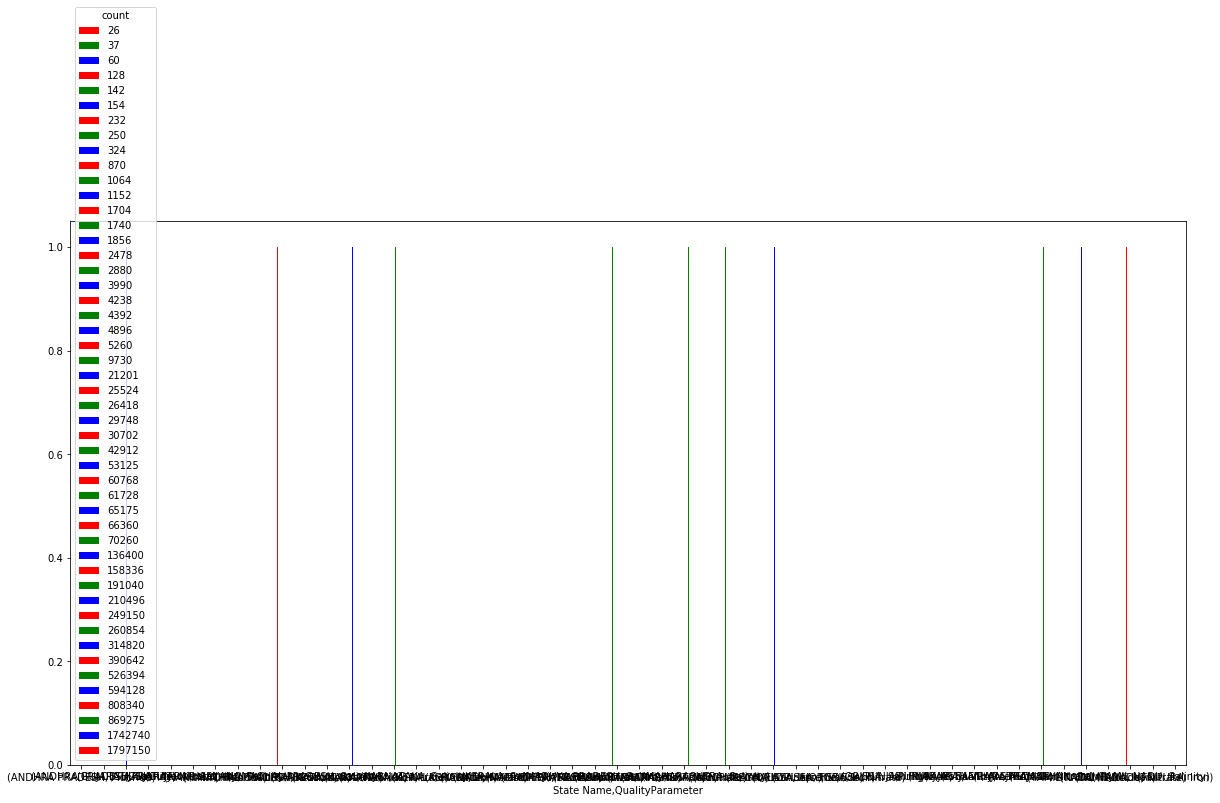

In [38]:
Group1.groupby(['State Name','QualityParameter', 'count']).QualityParameter.count().unstack().plot(kind='bar', legend=True, color=['r', 'g', 'b'],figsize=(20,10),rot=0)

In [47]:
res = Group1.groupby(['State Name', 'QualityParameter']).size()
res

State Name        QualityParameter
ANDHRA PRADESH    Fluoride            1
                  Salinity            1
GUJARAT           Fluoride            1
                  Iron                1
                  Nitrate             1
                  Salinity            1
HARYANA           Fluoride            1
                  Salinity            1
HIMACHAL PRADESH  Arsenic             1
                  Iron                1
                  Salinity            1
KARNATAKA         Arsenic             1
                  Fluoride            1
                  Iron                1
                  Nitrate             1
                  Salinity            1
KERALA            Fluoride            1
                  Iron                1
                  Nitrate             1
                  Salinity            1
MADHYA PRADESH    Fluoride            1
                  Iron                1
                  Nitrate             1
                  Salinity            1
MAHAR

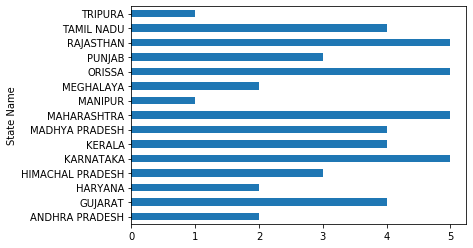

In [42]:
res.plot.barh()